In [1]:
from simulate import VAR
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
import yaml

In [2]:
with open("configs/config.yaml", "r") as stream:
    try:
        cfg = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

In [3]:
data_A = VAR.simulate_var_endogenous(cfg['endogenous'])
data_B = VAR.simulate_var_latent(cfg['latent'])
data_C = VAR.simulate_var_retail_latent(cfg['retail_latent'])

In [4]:
theta_A = data_A['beta']
theta_B = np.concatenate([data_B['beta'], data_B['alpha']], 1)
theta_C = np.concatenate([data_C['beta'], data_C['alpha'], data_C['gamma'], data_C['delta']], 1)

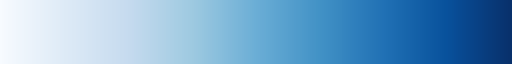

In [5]:
cmp = "Blues"
sns.color_palette("Blues", as_cmap=True)

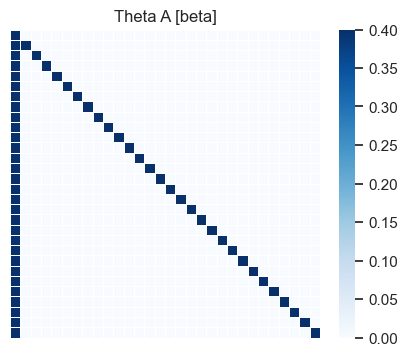

In [6]:
sns.set(rc={'figure.figsize':(5, 4)})
ax = sns.heatmap(theta_A, linewidth=0.5, cmap=cmp).set(title='Theta A [beta]')
plt.axis('off')
plt.show()

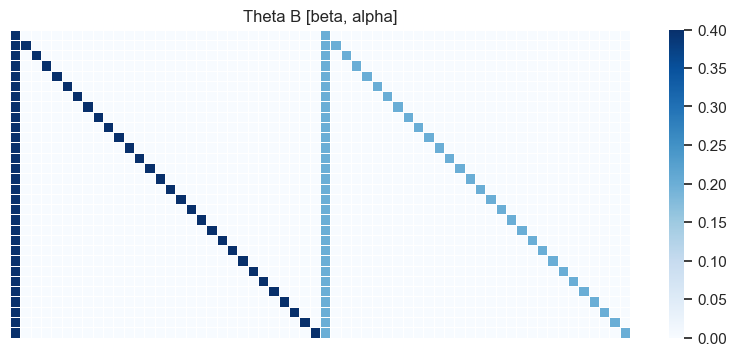

In [7]:
sns.set(rc={'figure.figsize':(10, 4)})
ax = sns.heatmap(theta_B, linewidth=0.5, cmap=cmp).set(title='Theta B [beta, alpha]')
plt.axis('off')
plt.show()

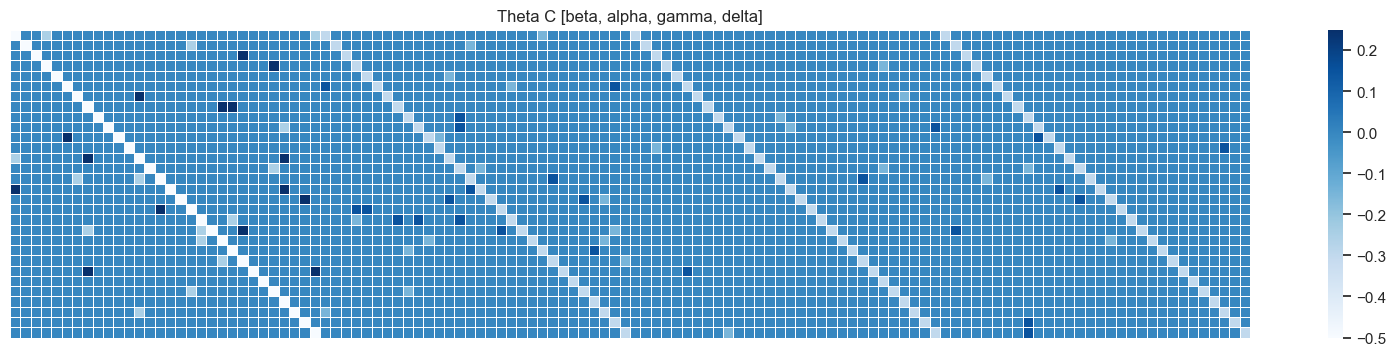

In [8]:
sns.set(rc={'figure.figsize':(20, 4)})
ax = sns.heatmap(theta_C, linewidth=0.5, cmap=cmp).set(title='Theta C [beta, alpha, gamma, delta]')
plt.axis('off')
plt.show()

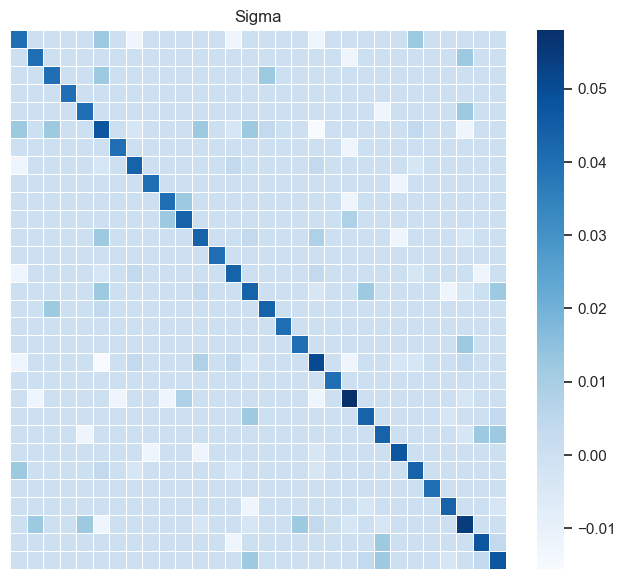

In [9]:
sns.set(rc={'figure.figsize':(8, 7)})
ax = sns.heatmap(data_C['sigma'], linewidth=0.5, cmap=cmp).set(title='Sigma')
plt.axis('off')
plt.show()

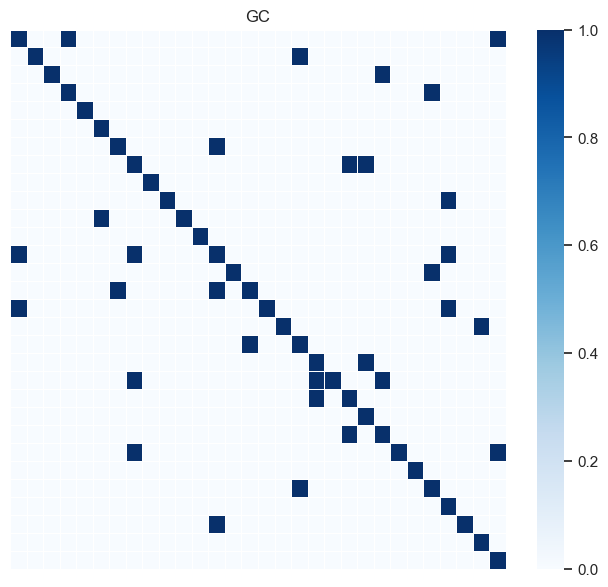

In [10]:
sns.set(rc={'figure.figsize':(8, 7)})
ax = sns.heatmap(data_C['GC'], linewidth=0.5, cmap=cmp).set(title='GC')
plt.axis('off')
plt.show()